In [1]:
#!pip install networkit
#!pip install pyvis
import networkx as nx
import networkit as nk
import csv
from tqdm import tqdm
import pandas as pd
import numpy as np
from pyvis.network import Network
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
edges = pd.read_csv("data/fb-pages-politician.edges", sep = ",", header=None)
nodes = pd.read_csv("data/fb-pages-politician.nodes", sep = ",")

In [5]:
nodes

,id,name,new_id
0,127397457601670,陳根德,1661
1,169014523134260,林淑芬,52
2,295363753921281,Chris White,3477
3,613631835423903,Stewart Hosie MP,3193
4,284882801581896,Frank Schäffler,4425
...,...,...,...
5903,342943772496246,Kevin Byrne,3778
5904,193944157325672,Timur Husein,439
5905,142026376065,Jeremy Lefroy,159
5906,294019144024664,Ileana Argentin,107


In [50]:
#needs a dictionary in order to relabel the nodes
labelsDict = pd.Series(nodes.name.values,index=nodes.new_id).to_dict()

In [7]:
G = nx.Graph()
G = nx.from_pandas_edgelist(edges,0, 1)
G = nx.relabel_nodes(G, labelsDict)

In [12]:
G.is_directed()

False

In [51]:
print("Is G connected? ",nx.is_connected(G))
print("Number of connected components: ", nx.number_connected_components(G))

Is G connected?  True
Number of connected components:  1


In [52]:
import time
start_time = time.time()
colsenessCentrality = nx.closeness_centrality(G)
print("--- %s seconds ---" % (time.time() - start_time))

--- 46.554238080978394 seconds ---


In [53]:
start_time = time.time()
betweennessCentrality = nx.betweenness_centrality(G)
print("--- %s seconds ---" % (time.time() - start_time))

--- 213.75057363510132 seconds ---


In [54]:
nkG = nk.nxadapter.nx2nk(G)

In [55]:
start_time = time.time()
nkColsenessCentrality = nk.centrality.Closeness(nkG,True,False).run()
print("--- %s seconds ---" % (time.time() - start_time))
nkColsenessCentrality.ranking()

--- 0.5502626895904541 seconds ---


[(703, 0.3588574901245822),
 (853, 0.3235084643620227),
 (941, 0.32047107348312165),
 (855, 0.3174219211955061),
 (228, 0.3124669277172188),
 (157, 0.31085491682459465),
 (50, 0.3096973829128861),
 (219, 0.3075360658299047),
 (810, 0.30554693159474283),
 (233, 0.3051521885173893),
 (177, 0.30491583187028815),
 (857, 0.30389583654984303),
 (147, 0.30261876697586226),
 (209, 0.3008763884642821),
 (424, 0.29979184647408236),
 (948, 0.2995637175324676),
 (1392, 0.2960641764853347),
 (2910, 0.29591581057379107),
 (2527, 0.2958120428814748),
 (2123, 0.29579722486600213),
 (34, 0.29533860158047415),
 (255, 0.29471950489119586),
 (214, 0.2946459757497131),
 (57, 0.2932849905632264),
 (2495, 0.2932412971147639),
 (799, 0.29271798939176125),
 (692, 0.2926889714993804),
 (308, 0.29238463061992476),
 (213, 0.28997250049106266),
 (943, 0.28957434287956063),
 (1887, 0.28936149360513547),
 (230, 0.2890357317670093),
 (1576, 0.2890215848465567),
 (138, 0.28893673239712286),
 (247, 0.28878129890453835)

In [56]:
start_time = time.time()
nkBetweennessCentrality = nk.centrality.Betweenness(nkG,True,False).run()
print("--- %s seconds ---" % (time.time() - start_time))
nkBetweennessCentrality.ranking()

--- 5.834164142608643 seconds ---


[(703, 0.5366164402734528),
 (177, 0.111041964907807),
 (157, 0.10829224089393591),
 (810, 0.09654886256228755),
 (255, 0.09017589220675058),
 (140, 0.07455223950912733),
 (50, 0.07073600343133891),
 (951, 0.0681602659432724),
 (138, 0.06358624632468853),
 (638, 0.05798552776765502),
 (308, 0.057584724227971895),
 (853, 0.05559133272319918),
 (209, 0.04699840606142192),
 (2495, 0.0455104494539293),
 (202, 0.04419349057743662),
 (767, 0.04380878402193166),
 (228, 0.04346008515930888),
 (2910, 0.04007547448323067),
 (855, 0.04004459839665027),
 (1027, 0.039309839749330326),
 (941, 0.03808317017861682),
 (147, 0.037821492956939505),
 (1229, 0.03777859538763542),
 (1265, 0.03668379124514483),
 (1392, 0.03665625937969772),
 (243, 0.03444987411398085),
 (34, 0.03324997301123423),
 (857, 0.032531214358767234),
 (1231, 0.031400149662922906),
 (2123, 0.030463706190247),
 (3723, 0.02962348031572207),
 (708, 0.029332385231254834),
 (219, 0.029328944403908503),
 (1397, 0.028578412735030905),
 (233

In [57]:
start_time = time.time()
nkApproxColsenessCentrality = nk.centrality.ApproxCloseness(nkG,True,False).run()
print("--- %s seconds ---" % (time.time() - start_time))
nkApproxColsenessCentrality.ranking()

--- 0.005883455276489258 seconds ---


[(266, 0.00016934801016088062),
 (275, 0.00016934801016088062),
 (596, 0.00016934801016088062),
 (603, 0.00016934801016088062),
 (3631, 0.00016934801016088062),
 (86, 8.467400508044031e-05),
 (255, 8.467400508044031e-05),
 (265, 8.467400508044031e-05),
 (267, 8.467400508044031e-05),
 (270, 8.467400508044031e-05),
 (271, 8.467400508044031e-05),
 (272, 8.467400508044031e-05),
 (273, 8.467400508044031e-05),
 (274, 8.467400508044031e-05),
 (276, 8.467400508044031e-05),
 (277, 8.467400508044031e-05),
 (278, 8.467400508044031e-05),
 (279, 8.467400508044031e-05),
 (280, 8.467400508044031e-05),
 (281, 8.467400508044031e-05),
 (282, 8.467400508044031e-05),
 (519, 8.467400508044031e-05),
 (530, 8.467400508044031e-05),
 (595, 8.467400508044031e-05),
 (597, 8.467400508044031e-05),
 (598, 8.467400508044031e-05),
 (600, 8.467400508044031e-05),
 (601, 8.467400508044031e-05),
 (606, 8.467400508044031e-05),
 (607, 8.467400508044031e-05),
 (609, 8.467400508044031e-05),
 (610, 8.467400508044031e-05),
 (1

In [58]:
start_time = time.time()
nkApproxBetweennessCentrality = nk.centrality.ApproxBetweenness(nkG).run()
print("--- %s seconds ---" % (time.time() - start_time))
nkApproxBetweennessCentrality.ranking()

--- 26.485185623168945 seconds ---


[(703, 0.268602963328152),
 (177, 0.055925286884122766),
 (157, 0.0546517678635),
 (810, 0.048763454112233415),
 (255, 0.04595623476569935),
 (140, 0.036822501574781175),
 (951, 0.035220332484320264),
 (50, 0.034823213649932516),
 (138, 0.031454550434091635),
 (638, 0.02924985621559414),
 (308, 0.028619943581737715),
 (853, 0.027346424561114944),
 (209, 0.023430011228877168),
 (2495, 0.02296442362993981),
 (202, 0.022416673513542915),
 (228, 0.022416673513542915),
 (767, 0.022224960972804002),
 (855, 0.021102073234190374),
 (147, 0.0192123353326211),
 (941, 0.01892476652151273),
 (2910, 0.018801522745323433),
 (1229, 0.01866458521622421),
 (1027, 0.018294853887656306),
 (243, 0.018103141346917394),
 (1392, 0.017747103771259414),
 (1265, 0.0176786350067098),
 (857, 0.017048722372853375),
 (34, 0.01670637855010532),
 (1231, 0.016131240927888583),
 (219, 0.015145290718374178),
 (2123, 0.015145290718374178),
 (3723, 0.015063128200914645),
 (708, 0.014871415660175732),
 (1397, 0.01457015309

In [23]:
#visualize a subgraph
H = G.subgraph(list(G.nodes)[:100])
nt = Network('900px','1820px')
nt.from_nx(H)
nt.show('nx.html')

# Global and local clustering coefficient

In [36]:
#Returns approximate average average local clustering coefficient (networkit)
ACC_nkG = nk.globals.clustering(nkG)
ACC_nkG

0.4279075827325632

In [37]:
#Local Clustering Coefficient does not accept graphs with self loops.
#We remove them and compute the scores 
nkG.removeSelfLoops()
LCC_nkG = nk.centrality.LocalClusteringCoefficient(nkG).run()

In [39]:
len(LCC_nkG.scores()),LCC_nkG.scores()

(5906,
 [0.5739957716701902,
  0.4423558897243108,
  0.5113636363636364,
  0.819047619047619,
  0.7719298245614035,
  0.7333333333333333,
  0.7142857142857143,
  0.3745632424877708,
  0.5032377428307123,
  0.7631578947368421,
  0.3790849673202614,
  0.7350427350427351,
  0.3911421911421911,
  0.2367816091954023,
  0.5231372549019608,
  0.6102418207681366,
  0.5505050505050505,
  0.6628787878787878,
  0.7792207792207793,
  0.6413793103448275,
  0.4117647058823529,
  0.4788732394366197,
  0.7660098522167488,
  0.578494623655914,
  0.25117845117845117,
  0.4767676767676768,
  0.673202614379085,
  0.6773109243697479,
  0.4250380517503805,
  0.3841313269493844,
  0.4231578947368421,
  0.5245143385753932,
  0.8260869565217391,
  0.3886832363828662,
  0.19473180076628352,
  0.6193181818181818,
  0.37462537462537465,
  0.5285024154589372,
  0.8382352941176471,
  0.4919636617749825,
  0.3075091575091575,
  0.20425129900803024,
  0.783625730994152,
  0.4439746300211416,
  0.6623655913978495,
  0

In [40]:
#Returns average clustering coefficient with networkx
ACC_nxG = nx.average_clustering(G)
ACC_nxG

0.38526532797801083

In [41]:
#Networkx does not return an error for the self loops.
#However we obtain a dictionary of the same length, 
#so it removes implicity the self loops
LCC_nxG = nx.clustering(G)
len(LCC_nxG), LCC_nxG

(5906,
 {'Mark Bailey MP - Labor for Miller': 0.5739957716701902,
  'Jo-Ann Miller MP': 0.4423558897243108,
  'Senator Claire Moore': 0.5113636363636364,
  'Shane King MP-  Labor for Kurwongbah': 0.819047619047619,
  'Di Farmer MP': 0.7719298245614035,
  'Leanne Linard MP': 0.7333333333333333,
  'Aaron Harper MP': 0.7142857142857143,
  'Sénateur Pierre-Hugues Boisvenu': 0.3745632424877708,
  'Jackie Trad': 0.5032377428307123,
  'Jim Madden - Labor for Ipswich West': 0.7631578947368421,
  '邱志偉': 0.3790849673202614,
  'Grace Grace MP': 0.7350427350427351,
  'Senator Chris Ketter': 0.3911421911421911,
  'Bill Shorten MP': 0.2367816091954023,
  'Craig Crawford - Labor For Barron River': 0.5231372549019608,
  'Stirling Hinchliffe MP': 0.6102418207681366,
  'Mark Ryan MP': 0.5505050505050505,
  'Dr Anthony Lynham': 0.6628787878787878,
  'Joe Kelly MP': 0.7792207792207793,
  'Linus Power': 0.6413793103448275,
  'Luke Howarth': 0.4117647058823529,
  'Andrew Leigh MP': 0.4788732394366197,
  'Do

# Random Graphs

In [46]:
#Erdös-Renyi model
ERD = nk.generators.ErdosRenyiGenerator(G.number_of_nodes(), 0.2).generate()
print(ERD.numberOfNodes(), ERD.numberOfEdges())
#nk.community.detectCommunities(ERD)

5906 3484258


In [47]:
#Simple variant of Erdös-Renyi model
#The node set is partitioned into a given number of subsets. Nodes within the same subset have a higher edge probability.
CRG = nk.generators.ClusteredRandomGraphGenerator(G.number_of_nodes(), 4, 0.2, 0.002).generate()
print(CRG.numberOfNodes(), CRG.numberOfEdges())
#nk.community.detectCommunities(CRG)

5906 897287


In [48]:
#Chung-Lu model
degreeSequence = [CRG.degree(v) for v in CRG.iterNodes()]
clgen = nk.generators.ChungLuGenerator(degreeSequence)
CLG = clgen.generate()
print(CLG.numberOfNodes(), CLG.numberOfEdges())
#nk.community.detectCommunities(CLG)

5906 897437


# Analysis in our network with Networkit

In [50]:
#connected components with networkit
cc = nk.components.ConnectedComponents(nkG)
cc.run()
print("number of components ", cc.numberOfComponents())
print("map of component size: ", cc.getComponentSizes())

number of components  1
map of component size:  {0: 5906}


In [60]:
#diameter (estimate)
#This algorithm gives an estimation of the diameter of a given graph. The algorithm is based on the ExactSumSweep algorithm presented in Michele Borassi, Pierluigi Crescenzi, Michel Habib, Walter A. Kosters, Andrea Marino, Frank W. Takes: http://www.sciencedirect.com/science/article/pii/S0304397515001644.
diam = nk.distance.Diameter(nkG,algo=1)
diam.run()
diam.getDiameter() 
#The return value of getDiameter is a pair of integers: the lower bound and upper bound of the diameter. 
#In the case, that we computed the exact diameter, the diameter is the first value of the pair.

(14, 0)

In [57]:
#diameter (effective)
#The effective diameter is defined as the number of edges on average to reach a given ratio of all other nodes.
#The EffectiveDiameter(G, ratio=0.9) constructor expects an undirected graph and the ratio of nodes that should be connected. The ratio must be between in the interval (0,1].
ed = nk.distance.EffectiveDiameter(nkG)
ed.run()
ed.getEffectiveDiameter()

5.816796478157806

In [61]:
#effective diameter approximation
eda = nk.distance.EffectiveDiameterApproximation(nkG)
eda.run()
eda.getEffectiveDiameter()

5.330849983068067

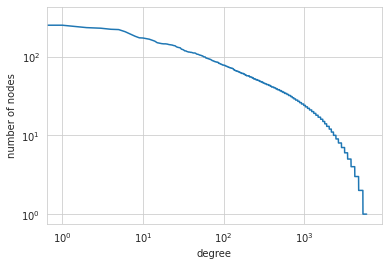

In [49]:
#degree distribution in our original graph
dd = sorted(nk.centrality.DegreeCentrality(nkG).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
plt.show()

In [38]:
#some info in our original graph if we are interested
communities = nk.community.detectCommunities(nkG)
nk.community.Modularity().getQuality(communities, nkG)

Communities detected in 0.02143 [s]
solution properties:
-------------------  ----------
# communities         30
min community size    10
max community size   574
avg. community size  196.867
modularity             0.867683
-------------------  ----------


0.8676831917161391

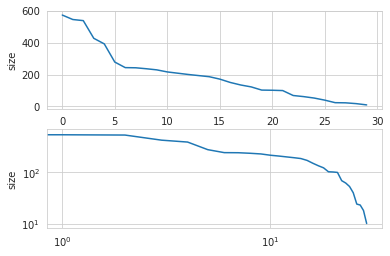

In [51]:
sizes = communities.subsetSizes()
sizes.sort(reverse=True)
ax1 = plt.subplot(2,1,1)
ax1.set_ylabel("size")
ax1.plot(sizes)

ax2 = plt.subplot(2,1,2)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel("size")
ax2.plot(sizes)
plt.show()